In [47]:
from pylab import *
%matplotlib inline

In [63]:
def rk4(ec,p_ini,x,args=0,h=0.01): #Runge Kutta de segundo orden
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1=ec(sol[i,:],tiempos[i])
            k2=ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3=ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4=ec(sol[i,:]+h*k3,tiempos[i]+h)
        #evaluando en el i-esimo
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) #cero no esta involucrado, esta en cuenta en p_ini
    else:
        for i in xrange(len(tiempos)-1):
            k1=ec(sol[i,:],tiempos[i],args)
            k2=ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3=ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4=ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [64]:
def ec_mov(r_v,t,fric=0,g=9.8,m=1): #ecuaciones de movimiento
    u=sqrt(r_v[2]**2+r_v[3]**2)
    dx=r_v[2]  #velocidad en r_v=(x,y,vx,vy)=(0,1,2,3) r=(pos),v=(vel)
    dy=r_v[3]
    if fric==0:
        dvx,dvy=0,-(g/m)
        #print "No use modelo de fricción"
    else:
        dvx=-(fric([r_v[2],r_v[3]]))[0]
        dvy=-(g/m)-(fric([r_v[2],r_v[3]]))[1]
        #print "Use modelo de fricción"
    return array([dx,dy,dvx,dvy])

In [65]:
#Modelos de friccion
def fric_id(v): #friccion ideal
    return array([0,0])

def fric_v(v,gamma=0.1):
    f_x=gamma*v[0]
    f_y=gamma*v[1]
    return array([f_x,f_y])

def fric_v2(v,gamma=0.1):
    norm_v=sqrt(v[0]**2+v[1]**2)
    f_x=gamma*norm_v*v[0]
    f_y=gamma*norm_v*v[1]
    return array([f_x,f_y])
    

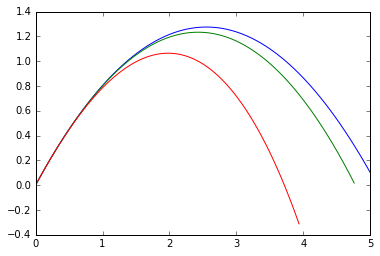

In [69]:
p=[0,0,5,5]
t,sol_id=rk4(ec_mov,p,[0,1])
t,sol_fv=rk4(ec_mov,p,[0,1],fric_v)
t,sol_fv2=rk4(ec_mov,p,[0,1],fric_v2)
plot(sol_id[:,0],sol_id[:,1])
plot(sol_fv[:,0],sol_fv[:,1])
plot(sol_fv2[:,0],sol_fv2[:,1])
show()

In [35]:
print ec_mov([1,1,1,1],1)
print ec_mov([1,1,1,1],1,fric_id)
print ec_mov([1,1,1,1],1,fric_v)
print ec_mov([1,1,1,1],1,fric_v2)

[ 1.   1.   0.  -9.8]
[ 1.   1.   0.  -9.8]
[ 1.   1.  -0.1 -9.9]
[ 1.          1.         -0.14142136 -9.94142136]


In [75]:
print sol_fv2[80,:][1]
print sol_fv2[-1,:][1]

0.486963819865
-0.311193109272
